In [3]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl

In [10]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

# Sauerstoff

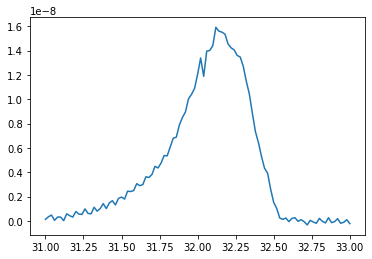

In [13]:
with open('Data/Hauptpeak Sauerstoff.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]
plt.plot(data[0],data[1])


err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.005
data = np.vstack([data,err])


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 50
    # variables        = 3
    chi-square         = 394813.679
    reduced chi-square = 8400.29103
    Akaike info crit   = 454.707311
    Bayesian info crit = 460.443380
[[Variables]]
    amplitude:  6.7348e-09 +/- 5.5026e-10 (8.17%) (init = 1.088511e-08)
    center:     32.0381631 +/- 0.01283013 (0.04%) (init = 32.13)
    sigma:      0.18382968 +/- 0.00673458 (3.66%) (init = 0.23)
    fwhm:       0.43288580 +/- 0.01585872 (3.66%) == '2.3548200*sigma'
    height:     1.4616e-08 +/- 1.5173e-09 (10.38%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.708
    C(amplitude, sigma)  = -0.461
    C(amplitude, center) = 0.284


array([[3.16000000e+01, 3.16100000e+01, 3.16200000e+01, 3.16300000e+01,
        3.16400000e+01, 3.16500000e+01, 3.16600000e+01, 3.16700000e+01,
        3.16800000e+01, 3.16900000e+01, 3.17000000e+01, 3.17100000e+01,
        3.17200000e+01, 3.17300000e+01, 3.17400000e+01, 3.17500000e+01,
        3.17600000e+01, 3.17700000e+01, 3.17800000e+01, 3.17900000e+01,
        3.18000000e+01, 3.18100000e+01, 3.18200000e+01, 3.18300000e+01,
        3.18400000e+01, 3.18500000e+01, 3.18600000e+01, 3.18700000e+01,
        3.18800000e+01, 3.18900000e+01, 3.19000000e+01, 3.19100000e+01,
        3.19200000e+01, 3.19300000e+01, 3.19400000e+01, 3.19500000e+01,
        3.19600000e+01, 3.19700000e+01, 3.19800000e+01, 3.19900000e+01,
        3.20000000e+01, 3.20100000e+01, 3.20200000e+01, 3.20300000e+01,
        3.20400000e+01, 3.20500000e+01, 3.20600000e+01, 3.20700000e+01,
        3.20800000e+01, 3.20900000e+01, 3.21000000e+01, 3.21100000e+01,
        3.21200000e+01, 3.21300000e+01, 3.21400000e+01, 3.215000

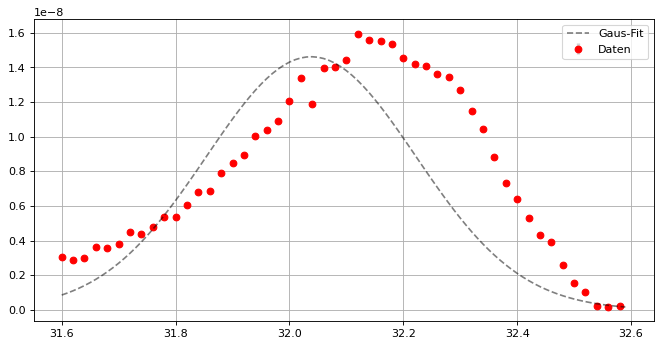

In [17]:
von =31.6
bis =32.6
vonarr = pos(von)
bisarr = pos(bis)

model_gaus = lmfit.models.GaussianModel()  
pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])

#Fitten
out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")

plt.grid()
plt.legend()
#plt.savefig('Results/'+str(path)+'.pdf')
print(out_gaus.fit_report())
np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])


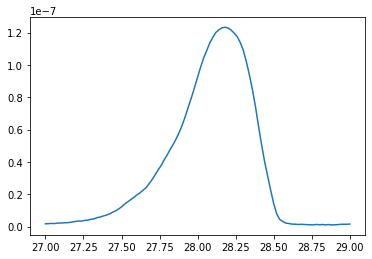

In [21]:
with open('Data/Hauptpeak Stickstoff.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]
plt.plot(data[0],data[1])

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.005
data = np.vstack([data,err])

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 100
    # variables        = 3
    chi-square         = 1176725.11
    reduced chi-square = 12131.1867
    Akaike info crit   = 943.307562
    Bayesian info crit = 951.123072
[[Variables]]
    amplitude:  2.9647e-08 +/- 3.0573e-09 (10.31%) (init = 9.169032e-08)
    center:     27.9135384 +/- 0.01247953 (0.04%) (init = 28.15)
    sigma:      0.30524338 +/- 0.01000898 (3.28%) (init = 0.25)
    fwhm:       0.71879321 +/- 0.02356934 (3.28%) == '2.3548200*sigma'
    height:     3.8748e-08 +/- 5.0407e-09 (13.01%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = -0.771
    C(center, sigma)     = -0.481
    C(amplitude, center) = 0.405


array([[2.70000000e+01, 2.70100000e+01, 2.70200000e+01, 2.70300000e+01,
        2.70400000e+01, 2.70500000e+01, 2.70600000e+01, 2.70700000e+01,
        2.70800000e+01, 2.70900000e+01, 2.71000000e+01, 2.71100000e+01,
        2.71200000e+01, 2.71300000e+01, 2.71400000e+01, 2.71500000e+01,
        2.71600000e+01, 2.71700000e+01, 2.71800000e+01, 2.71900000e+01,
        2.72000000e+01, 2.72100000e+01, 2.72200000e+01, 2.72300000e+01,
        2.72400000e+01, 2.72500000e+01, 2.72600000e+01, 2.72700000e+01,
        2.72800000e+01, 2.72900000e+01, 2.73000000e+01, 2.73100000e+01,
        2.73200000e+01, 2.73300000e+01, 2.73400000e+01, 2.73500000e+01,
        2.73600000e+01, 2.73700000e+01, 2.73800000e+01, 2.73900000e+01,
        2.74000000e+01, 2.74100000e+01, 2.74200000e+01, 2.74300000e+01,
        2.74400000e+01, 2.74500000e+01, 2.74600000e+01, 2.74700000e+01,
        2.74800000e+01, 2.74900000e+01, 2.75000000e+01, 2.75100000e+01,
        2.75200000e+01, 2.75300000e+01, 2.75400000e+01, 2.755000

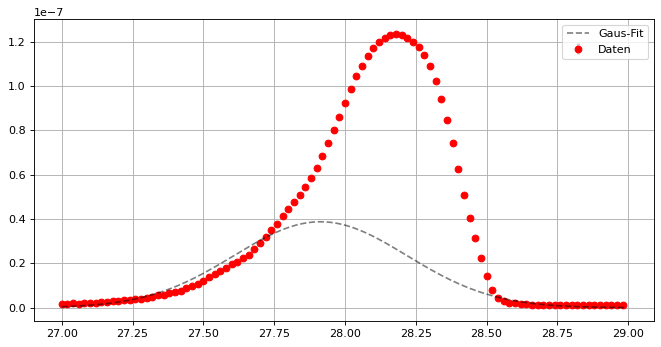

In [22]:
von =27
bis =29
vonarr = pos(von)
bisarr = pos(bis)

model_gaus = lmfit.models.GaussianModel()  
pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])

#Fitten
out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")

plt.grid()
plt.legend()
#plt.savefig('Results/'+str(path)+'.pdf')
print(out_gaus.fit_report())
np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])

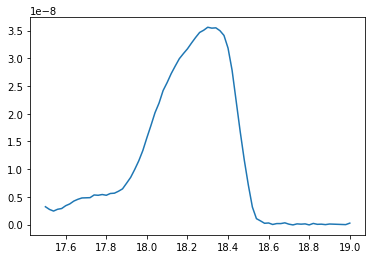

In [23]:
with open('Data/Hauptpeak Wasser.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]
plt.plot(data[0],data[1])

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.005
data = np.vstack([data,err])

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 75
    # variables        = 3
    chi-square         = inf
    reduced chi-square = inf
    Akaike info crit   = inf
    Bayesian info crit = inf
##  Warning: uncertainties could not be estimated:
    amplitude:  at initial value
    center:     at initial value
    sigma:      at initial value
[[Variables]]
    amplitude:  2.2468e-08 (init = 2.246772e-08)
    center:     18.2300000 (init = 18.23)
    sigma:      0.21000000 (init = 0.21)
    fwhm:       0.49451220 == '2.3548200*sigma'
    height:     4.2682e-08 == '0.3989423*amplitude/max(1e-15, sigma)'


/tmp/ipykernel_71657/4025803973.py:10: RuntimeWarning: divide by zero encountered in true_divide
  out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')


array([[1.75000000e+01, 1.75100000e+01, 1.75200000e+01, 1.75300000e+01,
        1.75400000e+01, 1.75500000e+01, 1.75600000e+01, 1.75700000e+01,
        1.75800000e+01, 1.75900000e+01, 1.76000000e+01, 1.76100000e+01,
        1.76200000e+01, 1.76300000e+01, 1.76400000e+01, 1.76500000e+01,
        1.76600000e+01, 1.76700000e+01, 1.76800000e+01, 1.76900000e+01,
        1.77000000e+01, 1.77100000e+01, 1.77200000e+01, 1.77300000e+01,
        1.77400000e+01, 1.77500000e+01, 1.77600000e+01, 1.77700000e+01,
        1.77800000e+01, 1.77900000e+01, 1.78000000e+01, 1.78100000e+01,
        1.78200000e+01, 1.78300000e+01, 1.78400000e+01, 1.78500000e+01,
        1.78600000e+01, 1.78700000e+01, 1.78800000e+01, 1.78900000e+01,
        1.79000000e+01, 1.79100000e+01, 1.79200000e+01, 1.79300000e+01,
        1.79400000e+01, 1.79500000e+01, 1.79600000e+01, 1.79700000e+01,
        1.79800000e+01, 1.79900000e+01, 1.80000000e+01, 1.80100000e+01,
        1.80200000e+01, 1.80300000e+01, 1.80400000e+01, 1.805000

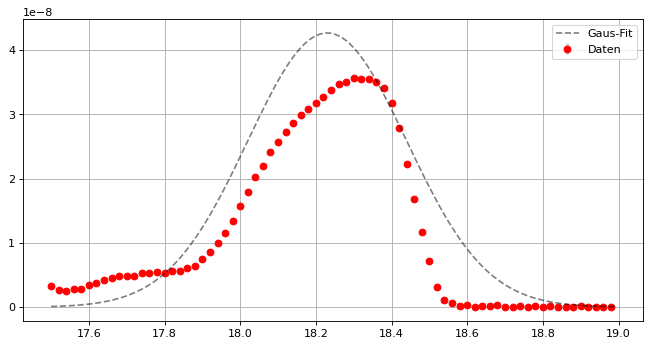

In [26]:
von =17.5
bis =19
vonarr = pos(von)
bisarr = pos(bis)

model_gaus = lmfit.models.GaussianModel()  
pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])

#Fitten
out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")

plt.grid()
plt.legend()
#plt.savefig('Results/'+str(path)+'.pdf')
print(out_gaus.fit_report())
np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])